<a href="https://colab.research.google.com/github/Sirhabeeb1/python/blob/main/Augmentation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Activation
from  tensorflow.keras.models import Sequential
import cv2
import os
import PIL
import tensorflow as tf

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataset_dir= tf.keras.utils.get_file("flower_photo", origin= dataset_url,cache_dir=r"C:\Users\HP\Desktop",extract=True )

In [3]:
dataset_dir

'/tmp/.keras/datasets/flower_photo'

In [8]:
from pathlib import Path
dataset_dir = Path('/tmp/.keras/datasets/flower_photos')
dataset_dir

PosixPath('/tmp/.keras/datasets/flower_photos')

In [9]:
jpg_file = len(list(dataset_dir.glob("*/*.jpg")))
jpg_file

3670

In [10]:
roses = list(dataset_dir.glob("roses/*.jpg"))[:5]
roses

[PosixPath('/tmp/.keras/datasets/flower_photos/roses/16157873719_bf0bdf8558_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/8523394349_61b31fdd8f_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/9159362388_c6f4cf3812_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/5332550500_ab341aefd8.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/3292434691_392071d702_n.jpg')]

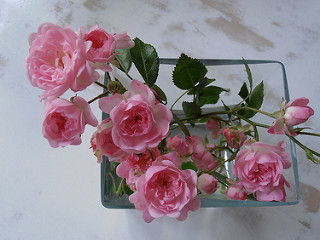

In [12]:
from PIL import Image
Image.open(str(roses[2]))

In [13]:
flowers_images_dict = {
    'roses': list(dataset_dir.glob('roses/*')),
    'daisy': list(dataset_dir.glob('daisy/*')),
    'dandelion': list(dataset_dir.glob('dandelion/*')),
    'sunflowers': list(dataset_dir.glob('sunflowers/*')),
    'tulips': list(dataset_dir.glob('tulips/*'))}

In [14]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [15]:
x = []
y = []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])


In [16]:
x = np.array(x)
y = np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [18]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [19]:
from tensorflow.keras import layers
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation="softmax")
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train, epochs=15)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/86 ━━━━━━━━━━━━━━━━━━━━ 86s 975ms/step - accuracy: 0.2751 - loss: 1.8177
Epoch 2/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 139s 942ms/step - accuracy: 0.5732 - loss: 1.0629
Epoch 3/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 85s 977ms/step - accuracy: 0.6801 - loss: 0.8307
Epoch 4/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 79s 918ms/step - accuracy: 0.8100 - loss: 0.5612
Epoch 5/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 83s 959ms/step - accuracy: 0.8854 - loss: 0.3328
Epoch 6/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 939ms/step - accuracy: 0.9380 - loss: 0.1998
Epoch 7/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 84s 960ms/step - accuracy: 0.9654 - loss: 0.1174
Epoch 8/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 80s 932ms/step - accuracy: 0.9848 - loss: 0.0629
Epoch 9/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 83s 958ms/step - accuracy: 0.9863 - loss: 0.0553
Epoch 10/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 944ms/step - accuracy: 0.9958 - loss: 0.0233
Epoch 11/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 82s 946ms/step - accuracy: 0.9856 - loss: 0.0502
Epoch 12/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 81s 943ms/

In [21]:
model.evaluate(x_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 595ms/step - accuracy: 0.5737 - loss: 2.9392


[2.7598659992218018, 0.5784313678741455]